[ 55  77  61  80  94  87 102 115 133 133 123 121 133 122 118 152 142 140
 120  96  84  71  39  26  19   9   8   3   0   4]
216.37114598925467 -636.6370861665209 3.3226700375837455


ValueError: shape mismatch: objects cannot be broadcast to a single shape

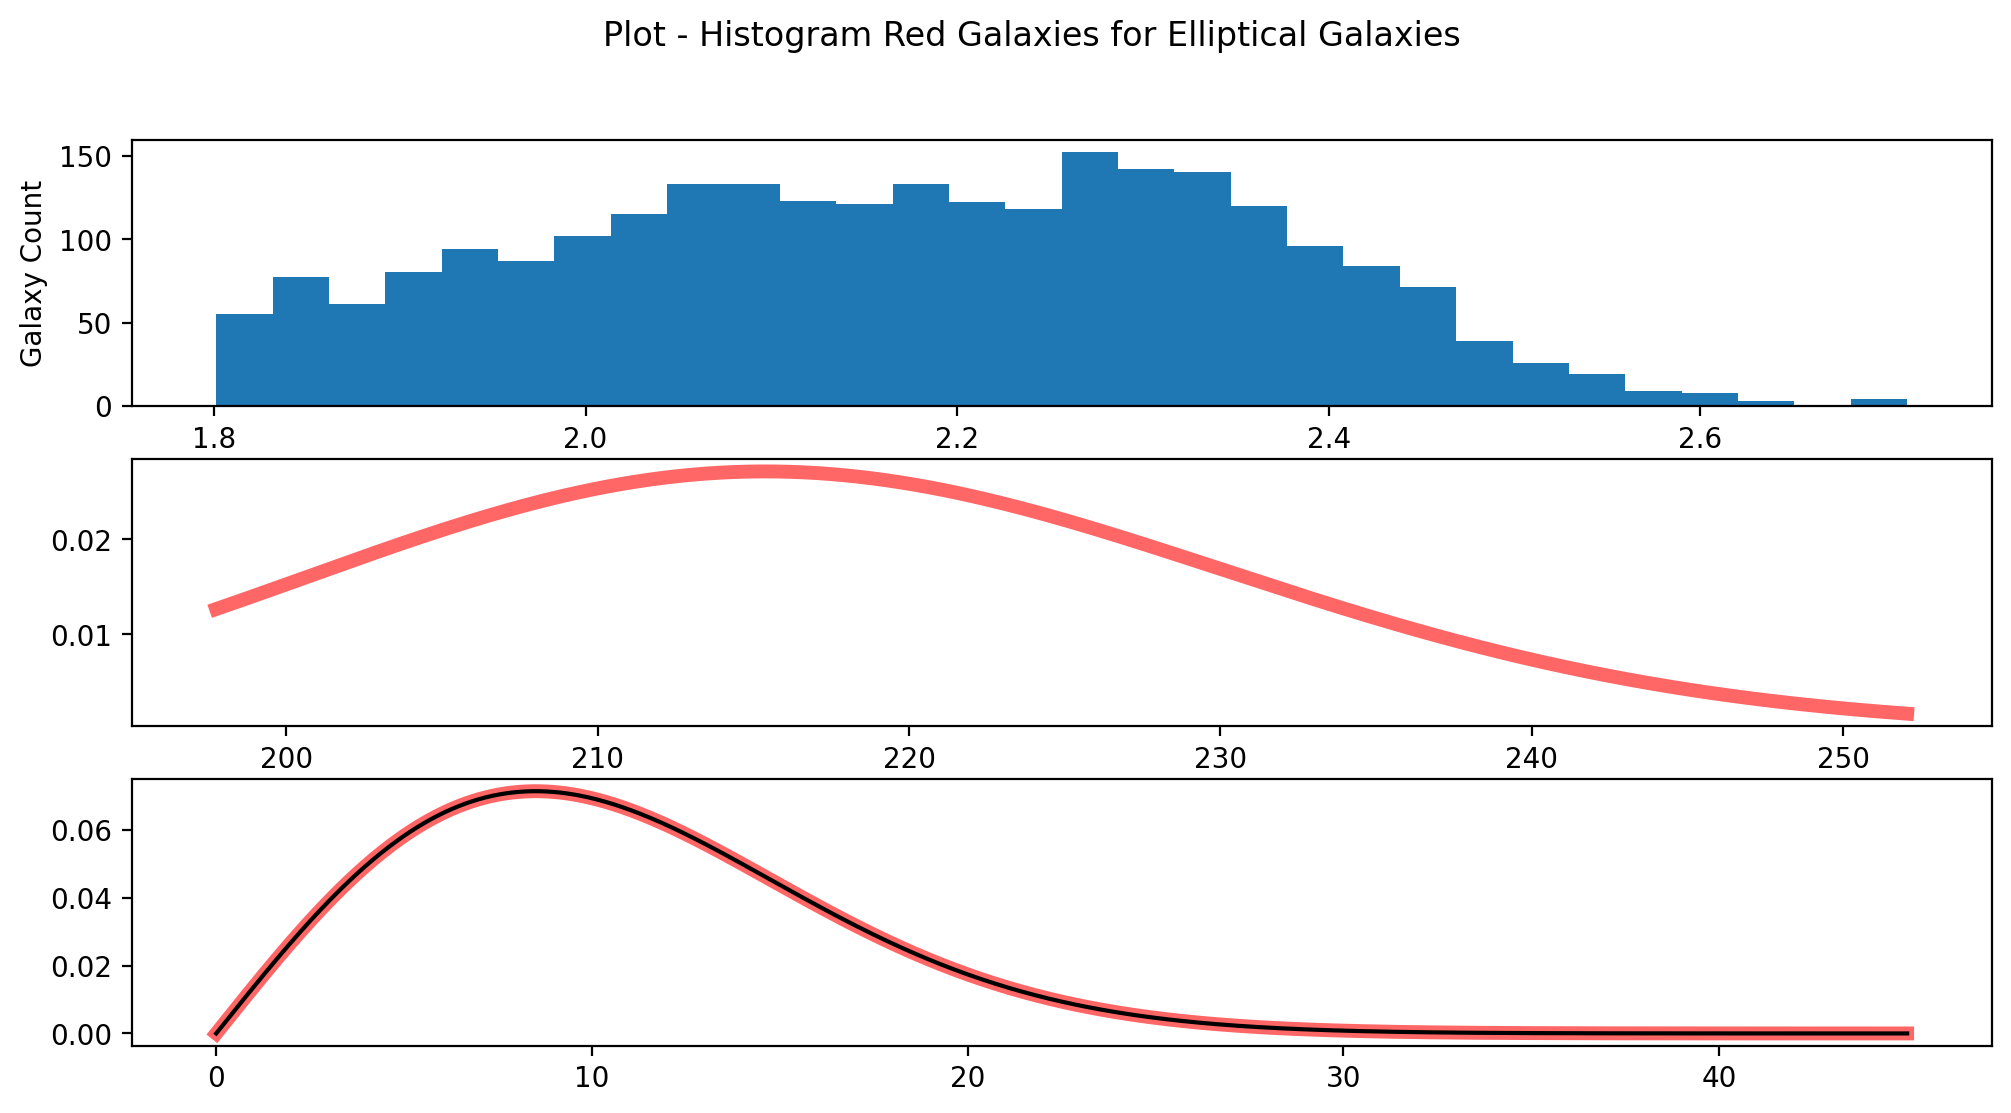

In [61]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

RawMassEClassEmeasure = Table.read('../../GAMA_Data/REMassEClassEmeasure.fits')
#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA
#REMassEClassEmeasure = RawMassEClassEmeasure[RawMassEClassEmeasure['CountInCyl']> -500]
RErange = RawMassEClassEmeasure[RawMassEClassEmeasure['CountInCyl']> -500]
RErange1 = RErange[RErange['SurfaceDensity']< 50]

binCount = 30
alphaVal = .3

##### uminusr
fig = plt.figure(figsize=(12, 6), dpi=200)
fig.suptitle('Plot - Histogram Red Galaxies for Elliptical Galaxies')
#fig.legend(loc="upper right")
#import scipy.stats as stats
from scipy import stats
xfield = 'uminusr'
counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
print(counts)
ag, bg, cg =stats.gamma.fit(counts)
print(ag, bg, cg)

ax1 = fig.add_subplot(3, 1, 1)
ax1.set_ylabel('Galaxy Count')
ax1.set_xlabel(xfield)
counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
ax1.hist(bins[:-1],bins, weights=counts)
ax2 = fig.add_subplot(3, 1, 2)
x = np.linspace(stats.gamma.ppf(0.1, ag),stats.gamma.ppf(0.99, ag), 243)
ax2.plot(x, stats.gamma.pdf(x, ag),'r-', lw=5, alpha=0.6, label='gamma pdf')

param = stats.rayleigh.fit(counts) # distribution fitting
# fitted distribution
xx = np.linspace(0,45,1000)
pdf_fitted = stats.rayleigh.pdf(xx,loc=param[0],scale=param[1])
pdf = stats.rayleigh.pdf(xx,loc=0,scale=8.5)

ax3 = fig.add_subplot(3, 1, 3)
plot(xx,pdf,'r-', lw=5, alpha=0.6, label='rayleigh pdf')
plot(xx,pdf,'k-', label='Data')
plt.bar(x[1:], counts)
plt.show()

